In [1]:
using ChaosTools
using DynamicalSystems
using PyPlot
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot
using Distributions

In [18]:
PyPlot.pygui(false)

false

In [2]:

x = rand(Truncated(Normal(0, 1.), -1., 1.), 100)
x=x.-8
y=rand(Truncated(Normal(0, 1.), -1.5, 1.5), 100)
grid=Iterators.product(x,y)
grid=collect.(grid)
println(grid[1])
println(grid[1][1])
#pre(grid[1][1],grid[1][2],m[1],m[2],a,b,Hinicial)

[-8.218404189987561, 0.08743503717792357]
-8.218404189987561


In [193]:
Xraros=[-33.4, -33.8, -33.5,-33.2, -33.2]
Praros=[1.49, 1.48, 1.46, 1.46, 1.5]
#xraros=[33.4, 33.8, 33.5,33.2, 33.2]
#Praros=[1.49, 1.48, 1.46, 1.46, 1.5]

5-element Array{Float64,1}:
 1.49
 1.48
 1.46
 1.46
 1.5 

  0.066598 seconds (91.38 k allocations: 4.625 MiB)
  0.000013 seconds (6 allocations: 8.141 KiB)
  0.401047 seconds (1.12 M allocations: 57.237 MiB, 2.66% gc time)


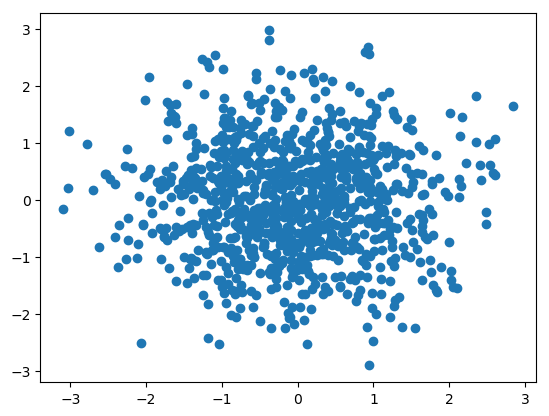

  0.134821 seconds (319.58 k allocations: 15.670 MiB)


1000-element Array{Float64,1}:
 1.532408502737956 
 1.3515047761696648
 1.296597020646557 
 1.344425662298223 
 1.5198837407567514
 1.6004142153558136
 1.441351687409531 
 1.3442640215029706
 1.620015905275864 
 1.4843470891997703
 1.430157313417376 
 1.2255567856331138
 1.340978326218379 
 ⋮                 
 1.5067719501985568
 1.3350039586762579
 1.3682189411917052
 1.5850016958876842
 1.5340057356745533
 1.3737035865076321
 1.3448321552922415
 1.504485509622856 
 1.6113398007408333
 1.5164942817337759
 1.612641390310283 
 1.3750806504563153

In [4]:
arraysize=1000
@time u1 = rand(arraysize)
@time u2 = rand(arraysize)
@time z0 = map.(sqrt,-2* map.(log,u1)) .*map.(cos,2. *pi*u2)
@time z1 = map.(sqrt,-2* map.(log,u1)) .*map.(sin,2. *pi*u2)
scatter(z0,z1)

xz0=z0*0.15
pz1=z1*0.1
Xz0=z0 .-33.5
Pz1=z1*0.1 .+1.45

#x=x.-8
#y=rand(Truncated(Normal(0, 1.), -1.5, 1.5), 100)
#grid=Iterators.product(x,y)
#grid=collect.(grid)
#println(grid[1])
#println(grid[1][1])

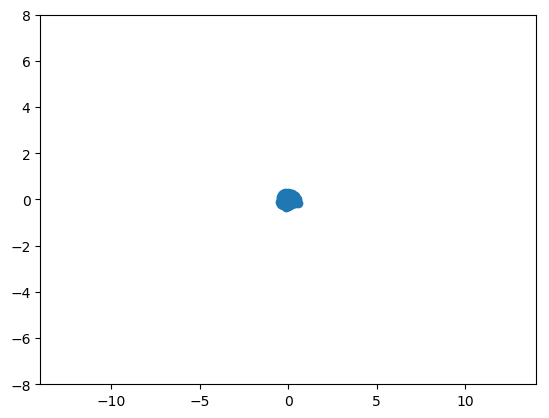

(-14, 14)

In [4]:
scatter(xz0,pz1)
ylim(-8,8)
xlim(-14,14)


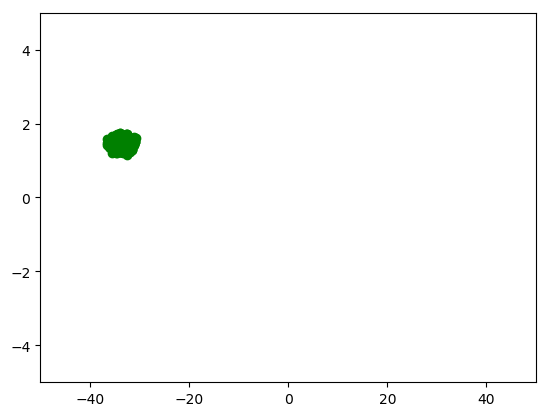

(-50, 50)

In [181]:
scatter(Xz0,Pz1,color="g")
ylim(-5,5)
xlim(-50,50)

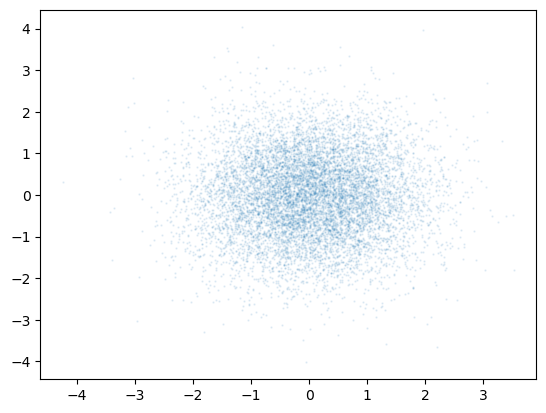

  0.177388 seconds (174.54 k allocations: 8.984 MiB)


PyObject <matplotlib.collections.PathCollection object at 0x14f35d590>

In [6]:
@time scatter(z0,z1,alpha=0.1,s=0.5)

In [31]:
initial_position = [0.1, 0.]
initial_momentum=[0. ,0.1]

2-element Array{Float64,1}:
 0.0
 0.1

In [21]:
function energia_poinc_abs(x0, p0, m0, M0, a0, b0, H0)
    return (2. *M0*(H0-p0*p0/(2. *m0)+a*x0*x0/2. -b*x0*x0*x0*x0/4. ))^(1. /2. )
end
epsilon=0.01
m=[1.,0.1]
w=[0.,0.8]
g=[0.,0.1]
a=0.25
b=0.01
entmutua=[]
entsys=[]
entpozo=[]
entosci=[]
time=100.
dts=1//100
entropies=zeros(100)
Q1=[]
Q2=[]
P1=[]
P2=[]
tspan=(0., time)
k=0
sol3=0

m[2]=0.1
w[2]=0.7071
g[2]=0.05
dts=0.001*2. *pi/w[2]
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)
initial_position[2]=0.

@time for jj =1:10000
    #println(jj)
    Hinicial=15.0
    initial_position[1]=grid[jj][1]
    initial_momentum[1]=grid[jj][2]
    
    initial_momentum[2]=energia_poinc_abs(initial_position[1],initial_momentum[1],m[1],m[2],a,b,Hinicial) #osciladores
    prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
    sol3 = solve(prob, CalvoSanz4(), dt=dts);
    #@time sol3 = solve(prob, CalvoSanz4(), dt=dts);
    push!(Q1,sol3[3,1:10:end])
    push!(Q2,sol3[4,1:10:end])
    push!(P1,sol3[1,1:10:end])
    push!(P2,sol3[2,1:10:end])
    k=sol3
    

end
dim=length(Q2[1])
Q1=reduce(hcat,Q1)
Q2=reduce(hcat,Q2)
P1=reduce(hcat,P1)
P2=reduce(hcat,P2)
system=cat(Q1,Q2,P1,P2,dims=3)
pozo=cat(Q1,P1,dims=3)
oscilador=cat(Q2,P2,dims=3)
println(dim)
bbb=0
ccc=0

#draw()
@time for iiii in 1:dim
    num=lpad(iiii,8,"0")
    systemdata=Dataset(system[iiii,:,:])
    push!(entsys,genentropy(1, epsilon, systemdata;base=2.))
    pozodata=Dataset(pozo[iiii,:,:])
    if iiii==20
        bbb=pozodata
    end
    if iiii%5==0
        PyPlot.scatter(pozodata[:,1],pozodata[:,2], alpha=0.4, s=1.5)
        ylim(-6,6)
        xlim(-11,11)
        xlabel("x")
        ylabel("p")
        title("Espacio de fase del pozo")
        savefig("gifs/pozo$num.png")
        clf()
    end


    push!(entpozo,genentropy(1, epsilon, pozodata;base=2.))
    oscidata=Dataset(oscilador[iiii,:,:])
    if iiii==20
        ccc=oscidata
    end
    if iiii%5==0
        PyPlot.scatter(oscidata[:,1],oscidata[:,2], alpha=0.4, s=1.5)
        ylim(-2.5,2.5)
        xlim(-35,35)
        xlabel("x")
        ylabel("p")
        title("Espacio de fase del oscilador")
        savefig("gifs/osci$num.png")
        clf()
    end
    push!(entosci,genentropy(1, epsilon, oscidata;base=2.))
    push!(entmutua,entpozo[iiii]+entosci[iiii]-entsys[iiii])
end
#waitforbuttonpress()
#println(entsys)
#println(entpozo)
#println(entosci)
#println(entmutua)

BoundsError: BoundsError: attempt to access 70×70 Array{Array{Float64,1},2} at index [4901]

In [20]:
lim=1000
plot(entsys[1:400],label="system information")
plot(entpozo[1:400],label="particle information")
plot(entosci[1:400],label="oscillator information")
plot(entmutua[1:400],label="mutual information")
legend()
xlabel("time steps / 10")
ylabel("Shannon Information")
title("Mutual Information")
savefig("mutualinfo.png")
clf()

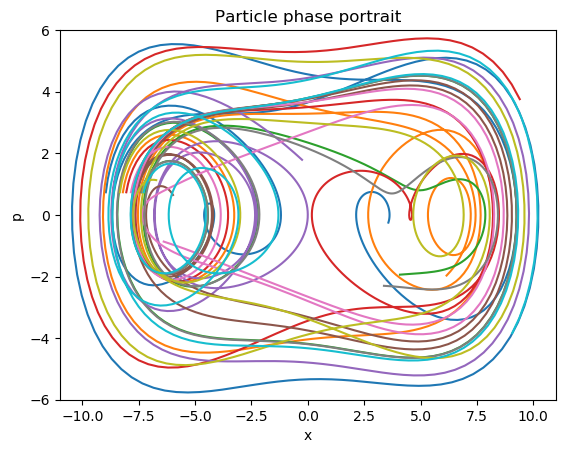

In [68]:
plot(Q1[1:400,1:10],P1[1:400,1:10])
title("Particle phase portrait")
xlabel("x")
ylabel("p")
ylim(-6,6)
xlim(-11,11)
savefig("mutualinfo_phase.png")
clf()

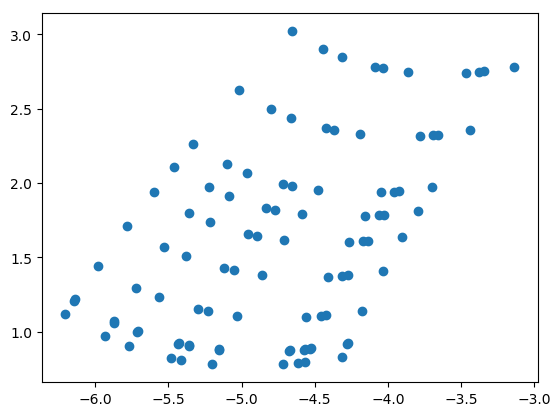

PyObject <matplotlib.collections.PathCollection object at 0x7f66095d7c50>

In [36]:
PyPlot.scatter(bbb[:,1],bbb[:,2])


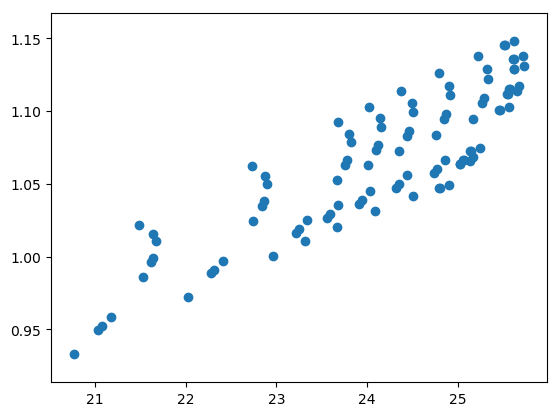

PyObject <matplotlib.collections.PathCollection object at 0x7f660805fe48>

In [62]:
PyPlot.scatter(ccc[:,1],ccc[:,2])

# Usando Box-Muller

In [184]:
initial_position = [0.1, 0.]
initial_momentum=[0. ,0.1]

function energia_poinc_abs(x0, p0, m0, M0, a0, b0, H0)
    return (2. *M0*(H0-p0*p0/(2. *m0)+a*x0*x0/2. -b*x0*x0*x0*x0/4. ))^(1. /2. )
end
epsilon=0.01
m=[1.,0.1]
w=[0.,0.8]
g=[0.,0.1]
a=0.25
b=0.01
entmutua=[]
entsys=[]
entpozo=[]
entosci=[]
#time=100.
time=20.
dts=1//100
entropies=zeros(100)
Q1=[]
Q2=[]
P1=[]
P2=[]
tspan=(0., time)
k=0
sol3=0

m[2]=0.1
w[2]=0.7071
g[2]=0.07
dts=0.01*2. *pi/w[2]
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)
initial_position[2]=0.
arraysize=5

@time for jj =1:arraysize
    if jj %100==0
        println(jj/arraysize)
    end
    #Hinicial=15.0
    initial_position[1]=0. #xz0[jj]
    initial_momentum[1]=0. #pz1[jj]
    initial_position[2]=Xraros[jj]#Xz0[jj]
    initial_momentum[2]=Praros[jj]#Pz1[jj]
    
    prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
    sol3 = solve(prob, CalvoSanz4(), dt=dts);
    #@time sol3 = solve(prob, CalvoSanz4(), dt=dts);
    push!(Q1,sol3[3,1:1:end])
    push!(Q2,sol3[4,1:1:end])
    push!(P1,sol3[1,1:1:end])
    push!(P2,sol3[2,1:1:end])
    k=sol3
    #plot(sol3[3,:])
    

end
dim=length(Q2[1])
Q1=reduce(hcat,Q1)
Q2=reduce(hcat,Q2)
P1=reduce(hcat,P1)
P2=reduce(hcat,P2)
system=cat(Q1,Q2,P1,P2,dims=3)
pozo=cat(Q1,P1,dims=3)
oscilador=cat(Q2,P2,dims=3)
println(dim)
bbb=0
ccc=0

#draw()
@time for iiii in 1:dim
    num=lpad(iiii,8,"0")
    systemdata=Dataset(system[iiii,:,:])
    push!(entsys,genentropy(1, epsilon, systemdata;base=2.))
    pozodata=Dataset(pozo[iiii,:,:])
    if iiii==20
        bbb=pozodata
    end
    if iiii%1==0#5==0
        #PyPlot.scatter(pozodata[:,1],pozodata[:,2], alpha=0.4, s=1.2)
        PyPlot.scatter(pozodata[:,1],pozodata[:,2])
        ylim(-10,10)
        xlim(-18,18)
        xlabel("x")
        ylabel("p")
        title("Espacio de fase del pozo")
        savefig("gifs/boxmuller/pozo$num.png")
        clf()
    end


    push!(entpozo,genentropy(1, epsilon, pozodata;base=2.))
    oscidata=Dataset(oscilador[iiii,:,:])
    if iiii==20
        ccc=oscidata
    end
    if iiii%1==0#5==0
        #PyPlot.scatter(oscidata[:,1],oscidata[:,2], alpha=0.4, s=1.2)
        PyPlot.scatter(oscidata[:,1],oscidata[:,2])
        ylim(-5,5)
        xlim(-50,50)
        xlabel("x")
        ylabel("p")
        title("Espacio de fase del oscilador")
        savefig("gifs/boxmuller/osci$num.png")
        clf()
    end
    push!(entosci,genentropy(1, epsilon, oscidata;base=2.))
    push!(entmutua,entpozo[iiii]+entosci[iiii]-entsys[iiii])
end
#waitforbuttonpress()
#println(entsys)
#println(entpozo)
#println(entosci)
#println(entmutua)

  3.999156 seconds (3.94 M allocations: 177.618 MiB)
227


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/santiago/.julia/packages/PyCall/kAhnQ/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'FileNotFoundError'>
FileNotFoundError(2, 'No such file or directory')
  File "/home/santiago/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 689, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/santiago/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py", line 2094, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/santiago/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2075, in print_figure
    **kwargs)
  File "/home/santiago/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 521, in print_png
    cbook.open_file_cm(filename_or_obj, "wb") as fh:
  File "/home/santiago/anaconda3/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/home/santiago/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 407, in open_file_cm
    fh, opened = to_filehandle(path_or_file, mode, True, encoding)
  File "/home/santiago/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 392, in to_filehandle
    fh = open(fname, flag, encoding=encoding)


In [18]:
lim=arraysize
plot(entsys[1:end],label="system information")
plot(entpozo[1:end],label="particle information")
plot(entosci[1:end],label="oscillator information")
plot(entmutua[1:end],label="mutual information")
legend()
xlabel("time steps / 10")
ylabel("Shannon Information")
title("Mutual Information")
savefig("zonarara_g0-07_division_mutualinfo_boxmuller.png")
clf()

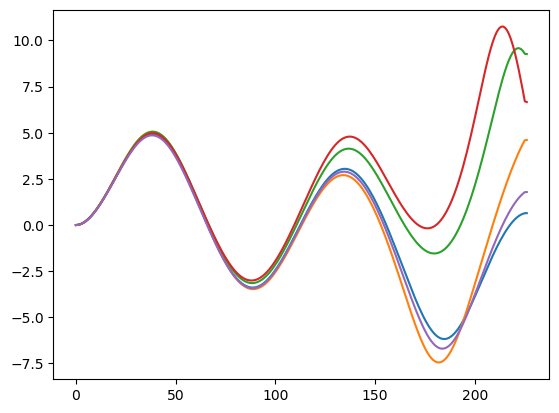

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14eab5590>

In [37]:
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:])
initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:])
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:])
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:])
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:])


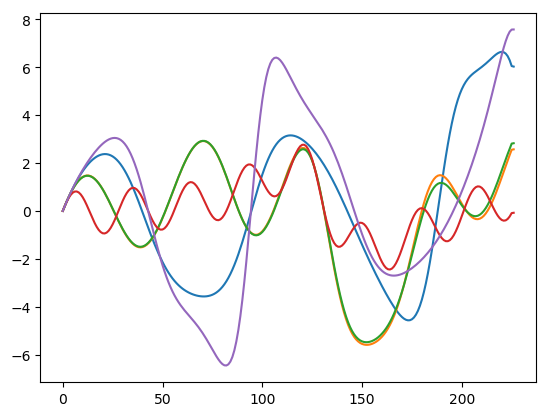

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff6f44549e8>

In [186]:
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]

w[2]=0.6324555320336759

prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[1,:])
initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
w[2]=0.6324555320336759*2.
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[1,:])
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[1,:])
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
w[2]=0.6324555320336759*4.
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[1,:])
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]

w[2]=0.6324555320336759*0.5

prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[1,:])

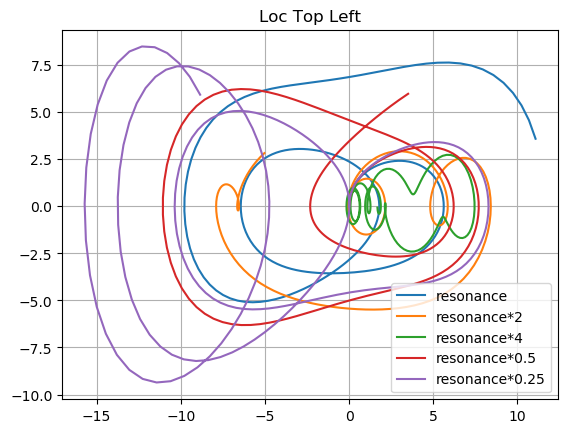

PyObject <matplotlib.legend.Legend object at 0x7ff6f40bf588>

In [194]:
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
w[2]=0.6324555320336759
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],label="resonance")
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
w[2]=0.632455532033675*2.
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],label="resonance*2")
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
w[2]=0.6324555320336759*4.
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],label="resonance*4")
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
w[2]=0.6324555320336759*0.5
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],label="resonance*0.5")
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
w[2]=0.6324555320336759*0.25
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],label="resonance*0.25")
PyPlot.grid(true)
title("Loc Top Left")
legend()

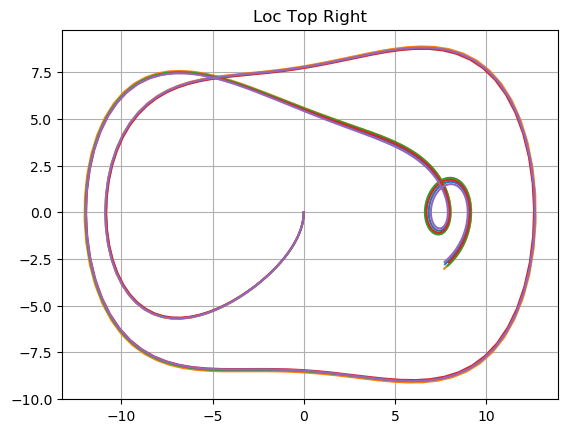

PyObject Text(0.5, 1, 'Loc Top Right')

In [54]:
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
PyPlot.grid(true)
title("Loc Top Right")

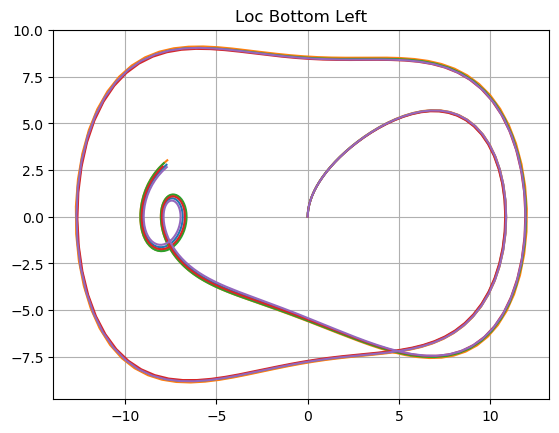

PyObject Text(0.5, 1, 'Loc Bottom Left')

In [58]:
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
PyPlot.grid(true)
title("Loc Bottom Left")

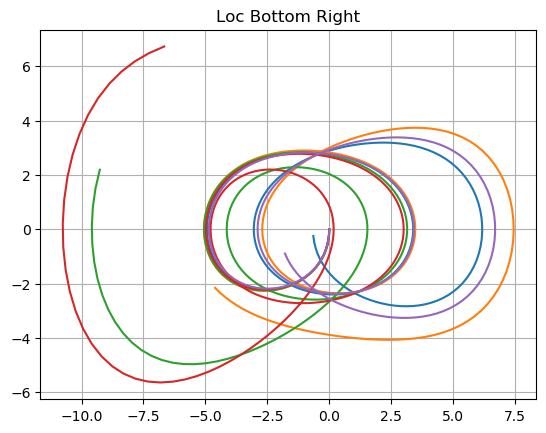

PyObject Text(0.5, 1, 'Loc Bottom Right')

In [61]:
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:])
PyPlot.grid(true)
title("Loc Bottom Right")

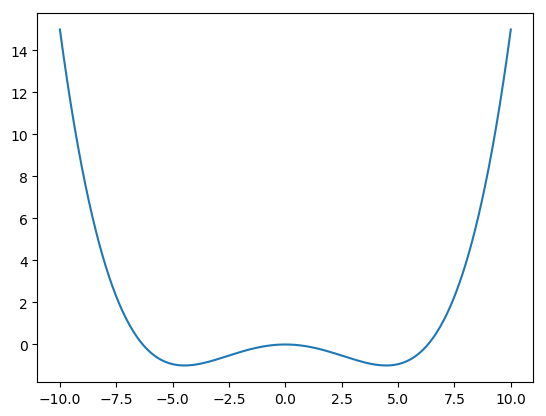

4.47213595499958

In [196]:
a=0.2
b=0.01
m=[1.,0.1]
w=[0.,0.70701]
f(x)=-a*x*x*0.5+b*x*x*x*x*0.25
xarray=range(-10,stop=10,length=1000)
yarray=f.(xarray)
plot(xarray,yarray)
f(sqrt(a/b))
sqrt(2. *a)
sqrt(a/b)


In [12]:
Hparticle(x,p)=p^2. /(2. ^m[1])-a*x*x*0.5+b*x*x*x*x*0.25
Hosci(x,p)=p^2. /(2. *m[2])+0.5*m[2]*w[2]*w[2]*x*x
Hinteract(x,X)=x*g[2]*X
Hosci(Xraros[1],Praros[1])

38.9818662284978

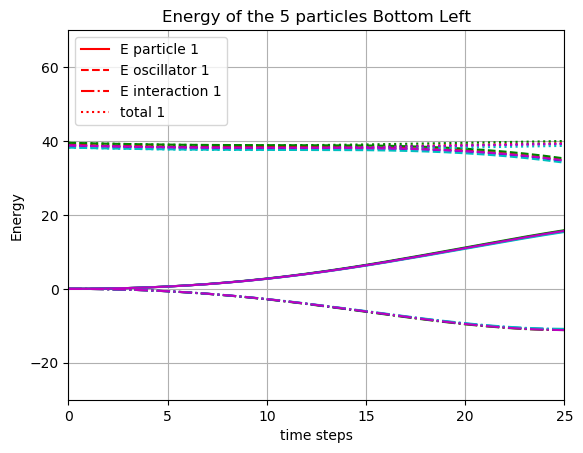

In [120]:
ppp=1
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),label="E particle $ppp", color="r")
plot(Hosci.(sol3[4,:],sol3[2,:]),label="E oscillator $ppp",color="r","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),label="E interaction $ppp",color="r","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),label="total $ppp",color="r",":")

ppp+=1


initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),color="g")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="g","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="g","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="g",":")


ppp+=1
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
continua=plot(Hparticle.(sol3[3,:],sol3[1,:]),color="b")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="b","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="b","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="b",":")


ppp+=1
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),color="c")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="c","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="c","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="c",":")


ppp+=1
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),color="m")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="m","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="m","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="m",":")


PyPlot.grid(true)
title("Energy of the 5 particles Bottom Left")
ylabel("Energy")
xlabel("time steps")
ylim([-30,70])
xlim([-0,25])
legend(loc="upper left")
savefig("short_parts5BL.png")


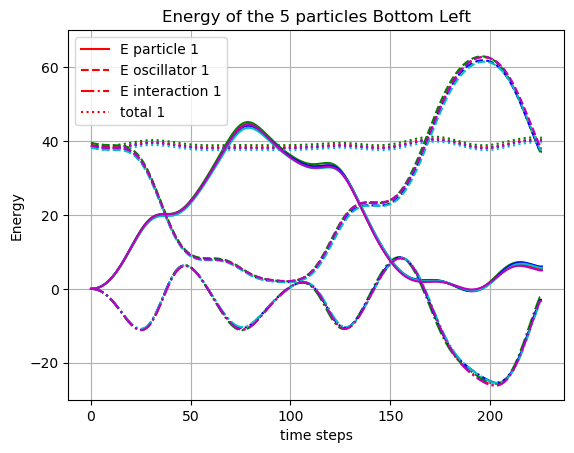

In [106]:
ppp=1
initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=Xraros[1]#Xz0[jj]
initial_momentum[2]=Praros[1]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),label="E particle $ppp", color="r")
plot(Hosci.(sol3[4,:],sol3[2,:]),label="E oscillator $ppp",color="r","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),label="E interaction $ppp",color="r","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),label="total $ppp",color="r",":")

ppp+=1


initial_position[2]=Xraros[2]#Xz0[jj]
initial_momentum[2]=Praros[2]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),color="g")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="g","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="g","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="g",":")


ppp+=1
initial_position[2]=Xraros[3]#Xz0[jj]
initial_momentum[2]=Praros[3]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
continua=plot(Hparticle.(sol3[3,:],sol3[1,:]),color="b")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="b","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="b","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="b",":")


ppp+=1
initial_position[2]=Xraros[4]#Xz0[jj]
initial_momentum[2]=Praros[4]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),color="c")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="c","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="c","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="c",":")


ppp+=1
initial_position[2]=Xraros[5]#Xz0[jj]
initial_momentum[2]=Praros[5]#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(Hparticle.(sol3[3,:],sol3[1,:]),color="m")
plot(Hosci.(sol3[4,:],sol3[2,:]),color="m","--")
plot(Hinteract.(sol3[3,:],sol3[4,:]),color="m","-.")
plot(Hparticle.(sol3[3,:],sol3[1,:]).+Hosci.(sol3[4,:],sol3[2,:]).+Hinteract.(sol3[3,:],sol3[4,:]),color="m",":")

ylim([-30,70])
PyPlot.grid(true)
title("Energy of the 5 particles Bottom Left")
ylabel("Energy")
xlabel("time steps")
legend(loc="upper left")
savefig("parts5BL.png")



In [139]:
w[2]=0.6324555320336759
m[2]=0.1
Hparticle(x,p)=p^2. /(2. ^m[1])-a*x*x*0.5+b*x*x*x*x*0.25
Hosci(x,p)=p^2. /(2. *m[2])+0.5*m[2]*w[2]*w[2]*x*x
Hinteract(x,X)=x*g[2]*X
Hosci(3.,0.14)


0.278

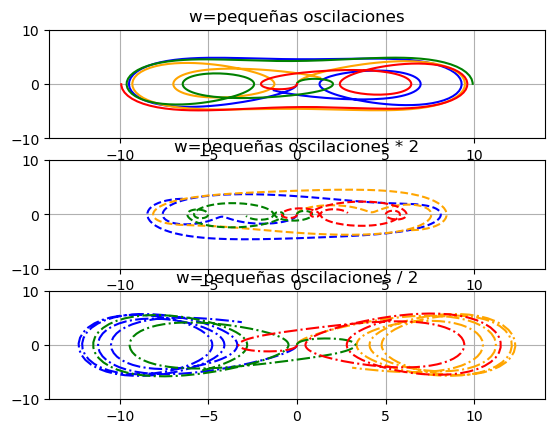

In [198]:
initial_position = [0.1, 0.]
initial_momentum=[0. ,0.1]

m=[1.,0.1]
w=[0.,0.8]
g=[0.,0.1]

X0=17.
P0=1.
g=[0., 0.]
time=20.
tspan=(0., time)
#fig=figure()
m[2]=0.1
w[2]=0.6324555320336759
g[2]=0.07
dts=0.01*2. *pi/w[2]
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=X0#Xz0[jj]
initial_momentum[2]=P0#Pz1[jj]
 
ax1=subplot(3, 1, 1)

prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax11=plot(sol3[3,:],sol3[1,:],color="b")

initial_position[2]=-X0#Xz0[jj]
initial_momentum[2]=-P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax12=plot(sol3[3,:],sol3[1,:],color="orange")

initial_position[2]=-X0#Xz0[jj]
initial_momentum[2]=P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax13=plot(sol3[3,:],sol3[1,:],color="green")

initial_position[2]=X0#Xz0[jj]
initial_momentum[2]=-P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax14=plot(sol3[3,:],sol3[1,:],color="r")
title("w=pequeñas oscilaciones")
PyPlot.grid(true)
xlim([-14,14])
ylim([-10,10])
w[2]=0.6324555320336759 * 2.
ax2=subplot(3, 1, 2,sharex=ax1)
initial_position[2]=X0#Xz0[jj]
initial_momentum[2]=P0#Pz1[jj]
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax21=plot(sol3[3,:],sol3[1,:],color="b","--")

initial_position[2]=-X0#Xz0[jj]
initial_momentum[2]=-P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax22=plot(sol3[3,:],sol3[1,:],color="orange","--")

initial_position[2]=-X0#Xz0[jj]
initial_momentum[2]=P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax23=plot(sol3[3,:],sol3[1,:],color="green","--")

initial_position[2]=X0#Xz0[jj]
initial_momentum[2]=-P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax24=plot(sol3[3,:],sol3[1,:],color="r","--")
PyPlot.grid(true)
title("w=pequeñas oscilaciones * 2")
xlim([-14,14])
ylim([-10,10])
w[2]=0.6324555320336759 / 2.
ax3=subplot(3, 1, 3,sharex=ax1)
initial_position[2]=X0#Xz0[jj]
initial_momentum[2]=P0#Pz1[jj]
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax31=plot(sol3[3,:],sol3[1,:],color="b","-.")

initial_position[2]=-X0#Xz0[jj]
initial_momentum[2]=-P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax32=plot(sol3[3,:],sol3[1,:],color="orange","-.")

initial_position[2]=-X0#Xz0[jj]
initial_momentum[2]=P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax33=plot(sol3[3,:],sol3[1,:],color="green","-.")

initial_position[2]=X0#Xz0[jj]
initial_momentum[2]=-P0#Pz1[jj]
    
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
ax34=plot(sol3[3,:],sol3[1,:],color="r","-.")

xlim([-14,14])
ylim([-10,10])
PyPlot.grid(true)
title("w=pequeñas oscilaciones / 2")
#fig, (ax11, ax12, ax13, ax4, ax21, ax22, ax23, ax24, ax31, ax32, ax33, ax34, ) = subplots(nrows=3, sharex=true)
savefig("condini_freq_mitad_doble.png")

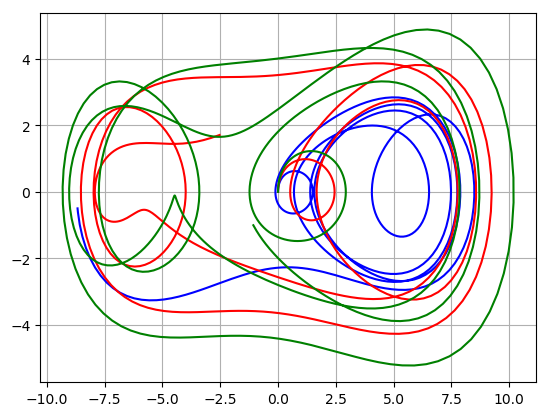

In [74]:
initial_position = [0.1, 0.]
initial_momentum=[0. ,0.1]

m=[1.,0.1]
w=[0.,0.8]
g=[0.,0.1]

X0=17.    
P0=1.
g=[0., 0.]
time=50.
tspan=(0., time)
#fig=figure()
m[2]=0.1
w[2]=0.6324555320336759
g[2]=0.07
dts=0.01*2. *pi/w[2]
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=-10.#Xz0[jj]
initial_momentum[2]=0.52#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],color="b")
m[2]=0.1
w[2]=0.6324555320336759
g[2]=0.07
dts=0.01*2. *pi/w[2]
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=-15.#Xz0[jj]
initial_momentum[2]=0.73#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],color="r")

m[2]=0.1
w[2]=0.6324555320336759
g[2]=0.07
dts=0.01*2. *pi/w[2]
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=-19.#Xz0[jj]
initial_momentum[2]=0.94#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
plot(sol3[3,:],sol3[1,:],color="g")

PyPlot.grid(true)

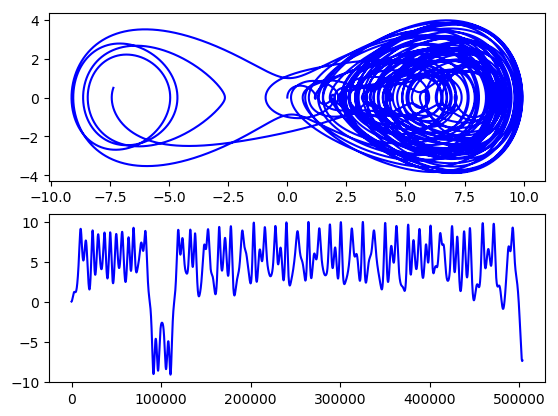

In [199]:
initial_position = [0.1, 0.,0.]
initial_momentum=[0. ,0.1,0.]


m=[1.,0.1,0.1]
w=[0.,0.8,0.8]
g=[0.,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=500.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
w[2]=0.6324555320336759*2.
g[2]=0.07
w[3]=0.6324555320336759
g[3]=0.09
dts=0.0001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. +q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=-5.35#Xz0[jj]
initial_momentum[2]=0.27#Pz1[jj]
initial_position[3]=-5.35#Xz0[jj]
initial_momentum[3]=0.27#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol3[4,:],sol3[1,:],color="b")
subplot(2, 1, 2)
plot(sol3[4,:],color="b")
savefig("dos_osci.png")

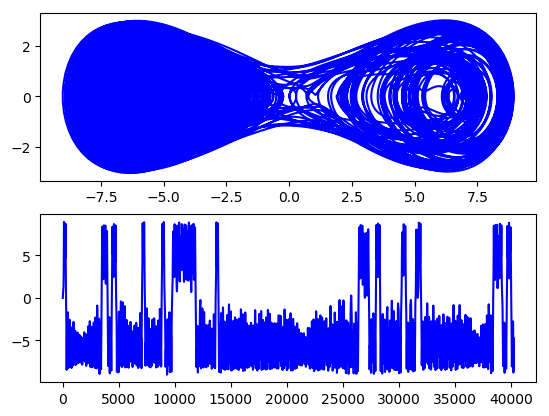

In [200]:
initial_position = [0.1, 0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.]


m=[1.,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=4000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759
g[2]=0.07
w[3]=0.6324555320336759*2.
g[3]=0.09
w[4]=0.6324555320336759*4.
g[4]=0.1

dts=0.01*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. +q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. +q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=-5.35#Xz0[jj]
initial_momentum[2]=0.27#Pz1[jj]
initial_position[3]=0.#Xz0[jj]
initial_momentum[3]=0.#Pz1[jj]
initial_position[4]=0.#Xz0[jj]
initial_momentum[4]=0.#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
sol3 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol3[5,:],sol3[1,:],color="b")
subplot(2, 1, 2)
plot(sol3[5,:],color="b")
savefig("tres_osci.png")